# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Denanda Aufadlan Tsaqif]
- **Email:** [denanda.aufladantsaquf@gmail.com]
- **ID Dicoding:** [denzz88denanda]

# Menentukan Pertanyaan Bisnis

1. Apa faktor-faktor yang mendorong pelanggan memberikan nilai ulasan rendah terhadap produk yang dibeli?
2. Bagaimana tren jumlah pesanan yang terkirim tepat waktu per bulan dari tahun 2017 hingga tahun 2018?
3. Metode pembayaran apa yang paling diminati oleh pelanggan dan efektif untuk meningkatkan penjualan?
4. Pendekatan apa yang dapat diambil untuk meningkatkan penjualan di pasar dengan mengidentifikasi dan menjangkau target pasar yang tepat secara efektif?

# Import Semua Packages/Library yang Digunakan

In [114]:
pip install pipreqs

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 257.3/257.3 kB 2.6 MB/s eta 0:00:00
     -------------------------------------- 798.3/798.3 kB 4.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=e758737904c9878fd5ea03bd1fc1392b95fa1d4eab957145879f1b8b941cd1e0
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\fc\ab\d4\5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
  Attempting uninstall: ipython
    Found existing installation: ipython 8.15.0
    Uninstalling ipython-8.15.0:
      Successfully uninstalled ipython-8.15.0
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 7.8.0
    Uninstalling nbconvert-7.8.0:
      Successfully uninstalled nbconvert-7.8.0

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: python.exe -m pi

In [125]:
import numpy as np
import pandas as pd # Akses ke Dataframe
import scipy as sc # Menggunakan numpy untuk komputasi statistik
import matplotlib # Grafik visualisasi data statis, animated, dan interaktif
import matplotlib.pyplot as plt
import re
import seaborn as sns
import streamlit

In [126]:
print(np.__version__)
print(pd.__version__)
print(sc.__version__)
print(matplotlib.__version__)
print(re.__version__)
print(sns.__version__)
print(streamlit.__version__)

1.23.1
2.2.1
1.8.1
3.8.2
2.2.1
0.13.2
1.31.1


# Data Wrangling

## Gathering Data

In [3]:
orders_df = pd.read_csv("orders_dataset.csv", delimiter = ";").iloc[:, [0,1,2,4,6,7]]
orders_payment_df = pd.read_csv("order_payments_dataset.csv", delimiter = ";")
orders_items_df = pd.read_csv("order_items_dataset.csv", delimiter = ";").iloc[: ,[0,1,2,5,6]]
orders_reviews_df = pd.read_csv("order_reviews_dataset.csv", delimiter = ";")[["review_id", "order_id", "review_score", "review_comment_message"]]

## Assessing Data

### Menilai Table Orders

In [4]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_approved_at              99281 non-null  object
 4   order_delivered_customer_date  96476 non-null  object
 5   order_estimated_delivery_date  99441 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [5]:
orders_df.describe()

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99281,96476,99441
unique,99441,99441,8,50462,75649,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/01/2018 10:32,01/02/2018 20:29,20/12/2017 00:00
freq,1,1,96478,109,7,522


In [6]:
print("Jumlah duplikasi orders: ", orders_df.duplicated().sum())

Jumlah duplikasi orders:  0


In [7]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_approved_at                 160
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### Kesimpulan 

1. Tidak terdapat data duplikat
2. Terdapat data kosong pada 2 kolom

### Meilai Table Order Payments

In [8]:
orders_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [9]:
orders_payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [10]:
print("Jumlah duplikasi order payments: ", orders_payment_df.duplicated().sum())

Jumlah duplikasi order payments:  0


In [11]:
orders_payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

#### Kesimpulan

1. Tidak terdapat data duplikat
2. Tidak terdapat data kosong 

### Menilai Table Order Items

In [12]:
orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
 4   freight_value  112650 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.3+ MB


In [13]:
orders_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [14]:
print("Jumlah duplikasi order items: ", orders_items_df.duplicated().sum())


Jumlah duplikasi order items:  0


In [15]:
orders_items_df.isna().sum()

order_id         0
order_item_id    0
product_id       0
price            0
freight_value    0
dtype: int64

#### Kesimpulan 

1. Tidak terdapat data duplikat
2. Tidak terdapat data kosong

### Menilai Table Orders Reviews

In [16]:
orders_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103381 entries, 0 to 103380
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   review_id               101502 non-null  object
 1   order_id                101909 non-null  object
 2   review_score            101762 non-null  object
 3   review_comment_message  40511 non-null   object
dtypes: object(4)
memory usage: 3.2+ MB


In [17]:
orders_reviews_df.describe()

,review_id,order_id,review_score,review_comment_message
count,101502,101909,101762,40511
unique,100333,98448,3729,35425
top,"""",15/05/2018 00:00,5,Muito bom
freq,29,25,56577,235


In [18]:
print("Jumlah duplikasi order reviews: ", orders_reviews_df.duplicated().sum())

Jumlah duplikasi order reviews:  642


In [19]:
orders_reviews_df.isna().sum()

review_id                  1879
order_id                   1472
review_score               1619
review_comment_message    62870
dtype: int64

#### Kesimpulan

1. Terdapat Data Duplikat
2. Terdapat data kosong pada seluruh tabel

### Kesimpulan Data Wrangling

Perlu dilakukan cleaning data pada tabel:

1. Orders
2. Orders Reviews

## Cleaning Data

### Membersihkan Table Orders_df

In [20]:
orders_df = orders_df[-orders_df.order_approved_at.isna() & -orders_df.order_delivered_customer_date.isna()]

In [21]:
print("Jumlah duplikasi order reviews: ", orders_df.duplicated().sum())

Jumlah duplikasi order reviews:  0


In [22]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_approved_at                0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [23]:
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'], 
                                                format ='%d/%m/%Y %H:%M')
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'],
                                                            format ='%d/%m/%Y %H:%M')
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'],
                                                            format ='%d/%m/%Y %H:%M')

In [24]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
67242,5c12f254446ca6ab5edd195f6ca79d22,754132cb2b8ef289dba4b60de444ff96,delivered,2018-06-05 04:52:00,2018-06-22 13:52:00,2018-07-17
67530,444262e0348a6fbd695402228e0ba8ef,140733e9ec44bed792bfa29d629c0367,delivered,2017-10-29 09:10:00,2017-11-09 17:28:00,2017-11-28
27061,bb27db571451a22cce47832d688ae49b,63b3eb851faae3c3c19d106082e2810e,delivered,2017-03-11 12:45:00,2017-03-27 12:56:00,2017-04-12
30821,06a3bd42be69cdf39cd785d311b54a45,9e43617117f81bfddf4b3ec7625752aa,delivered,2017-09-19 15:55:00,2017-09-26 21:30:00,2017-10-11
19780,d2161542680b09e3ef892b3d50327e10,4f71227399d972deea2af2ac102a6b30,delivered,2017-12-15 19:12:00,2017-12-22 22:37:00,2018-01-10


### Membersihkan Table Orders_reviews_df

In [25]:
# Membersihkan nilai yang bukan angka antara 1-5 menggunakan regular expressions
orders_reviews_df['review_score'] = orders_reviews_df['review_score'].apply(lambda x: re.findall(r'[1-5]', str(x)))

# Menghapus baris yang tidak memiliki nilai valid
orders_reviews_df = orders_reviews_df[orders_reviews_df['review_score'].apply(lambda x: len(x) > 0)]

# Mengonversi nilai ke dalam integer
orders_reviews_df['review_score'] = orders_reviews_df['review_score'].apply(lambda x: int(x[0]))

In [26]:
orders_reviews_df.drop_duplicates(inplace=True)

In [27]:
orders_reviews_df = orders_reviews_df[-orders_reviews_df.review_score.isna() & -orders_reviews_df.review_id.isna() & -orders_reviews_df.order_id.isna()]

In [28]:
orders_reviews_df.fillna(value = "No Comment", inplace = True)

In [29]:
print("Jumlah duplikasi order reviews: ", orders_reviews_df.duplicated().sum())

Jumlah duplikasi order reviews:  0


In [30]:
orders_reviews_df.isna().sum()

review_id                 0
order_id                  0
review_score              0
review_comment_message    0
dtype: int64

In [31]:
orders_reviews_df.describe()

,review_score
count,100281.000000
mean,4.036298
std,1.378744
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [32]:
orders_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_message
48853,ad60de23fb93557be83c1e600f748cac,c33368133f0a06d3c803f11e48f17309,4,No Comment
97974,27c30f53197c83b7f8a9b9e274e457bb,8bd24d561ec1ec5f12ca94ba62f44909,5,Excelente compra e melhor loja para comprar se...
93141,f0710a45e09b690641a9e8d127112911,bb06496dc2000dff076b93ef592d0a7f,5,No Comment
19966,"AMEI.""",25/03/2018 00:00,2,No Comment
26751,765ba5b03658dfacc616a53e41d9cf82,60a33bdbdd12f868ce8db165ae533c18,5,No Comment


In [33]:
print("Jumlah duplikasi orders: ", orders_df.duplicated().sum())
print("Jumlah duplikasi order payments: ", orders_payment_df.duplicated().sum())
print("Jumlah duplikasi order items: ", orders_items_df.duplicated().sum())
print("Jumlah duplikasi order reviews: ", orders_reviews_df.duplicated().sum())

Jumlah duplikasi orders:  0
Jumlah duplikasi order payments:  0
Jumlah duplikasi order items:  0
Jumlah duplikasi order reviews:  0


## Feature Extraction

#### Membuat Delivered Status

In [34]:
def determine_delivered_status(row):
    if row["order_delivered_customer_date"] <= row["order_estimated_delivery_date"]:
        return "Delivered on time"
    else:
        return "Delivered Late"
        
orders_df["delivered_status"] = orders_df.apply(determine_delivered_status, axis=1)

#### Membuat Delivery Time

In [35]:
delivery_time = (orders_df["order_delivered_customer_date"] - 
                              orders_df["order_approved_at"])
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["Delivery_time"] = round(delivery_time/86400)

In [36]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivered_status,Delivery_time
count,96462,96462,96462,96462,96462,96462,96462,96462.000000
unique,96462,96462,2,NaN,NaN,NaN,2,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,Delivered on time,NaN
freq,1,1,96456,NaN,NaN,NaN,88635,NaN
mean,NaN,NaN,NaN,2018-01-02 10:08:14.744044288,2018-01-14 13:15:50.903153408,2018-01-25 17:32:09.091248384,NaN,12.119881
min,NaN,NaN,NaN,2016-09-15 12:16:00,2016-10-11 13:46:00,2016-10-04 00:00:00,NaN,-7.000000
25%,NaN,NaN,NaN,2017-09-14 14:30:00,2017-09-25 22:31:45,2017-10-05 00:00:00,NaN,6.000000
50%,NaN,NaN,NaN,2018-01-22 13:48:30,2018-02-02 19:49:00,2018-02-16 00:00:00,NaN,10.000000
75%,NaN,NaN,NaN,2018-05-06 10:30:00,2018-05-15 23:06:45,2018-05-28 00:00:00,NaN,15.000000
max,NaN,NaN,NaN,2018-08-29 15:10:00,2018-10-17 13:22:00,2018-10-25 00:00:00,NaN,209.000000


### Membuat Customer Type

In [37]:
def determine_payment_status(row):
    if row["payment_sequential"] == 1:
        return "Normal Customer"
    elif (row["payment_sequential"] > 1) & (row["payment_sequential"] <= 5):
        return "Fixed Customer"
    else:
        return "Loyal Customer"
orders_payment_df["Customer Type"] = orders_payment_df.apply(determine_payment_status, axis=1)

In [38]:
orders_payment_df.describe(include = "all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value,Customer Type
count,103886,103886.000000,103886,103886.000000,103886.000000,103886
unique,99440,NaN,5,NaN,NaN,3
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN,Normal Customer
freq,29,NaN,76795,NaN,NaN,99360
mean,NaN,1.092679,NaN,2.853349,154.100380,NaN
std,NaN,0.706584,NaN,2.687051,217.494064,NaN
min,NaN,1.000000,NaN,0.000000,0.000000,NaN
25%,NaN,1.000000,NaN,1.000000,56.790000,NaN
50%,NaN,1.000000,NaN,1.000000,100.000000,NaN
75%,NaN,1.000000,NaN,4.000000,171.837500,NaN


In [39]:
orders_items_df

,order_id,order_item_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14
...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72


In [40]:
total_price = (orders_items_df["order_item_id"] * orders_items_df["price"])+orders_items_df["freight_value"]
orders_items_df["Total Order Price"] = total_price

## Join Data

### Orders Reviews

In [41]:
orders_reviewsjoin_df = pd.merge(
    left=orders_df,
    right=orders_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_reviewsjoin_df

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivered_status,Delivery_time,review_id,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18,Delivered on time,8.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Não testei o produto ainda, mas ele veio corre..."
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:00,2018-08-07 15:27:00,2018-08-13,Delivered on time,13.0,8d5266042046a06655c8db133d120ba5,4.0,Muito bom o produto.
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:00,2018-08-17 18:06:00,2018-09-04,Delivered on time,9.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,No Comment
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:00,2017-12-02 00:28:00,2017-12-15,Delivered on time,13.0,359d03e676b3c069f62cadba8dd3f6e8,5.0,O produto foi exatamente o que eu esperava e e...
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:00,2018-02-16 18:17:00,2018-02-26,Delivered on time,3.0,e50934924e227544ba8246aeb3770dd4,5.0,No Comment
...,...,...,...,...,...,...,...,...,...,...,...
96973,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-17 15:08:00,2017-03-28,Delivered on time,8.0,e262b3f92d1ce917aa412a9406cf61a6,5.0,No Comment
96974,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 13:10:00,2018-02-28 17:37:00,2018-03-02,Delivered on time,22.0,29bb71b2760d0f876dfa178a76bc4734,4.0,So uma peça que veio rachado mas tudo bem rs
96975,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 15:04:00,2017-09-21 11:24:00,2017-09-27,Delivered on time,25.0,371579771219f6db2d830d50805977bb,5.0,Foi entregue antes do prazo.
96976,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:36:00,2018-01-25 23:32:00,2018-02-15,Delivered on time,17.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,Foi entregue somente 1. Quero saber do outro p...


In [42]:
orders_reviewsjoin_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_approved_at                   0
order_delivered_customer_date       0
order_estimated_delivery_date       0
delivered_status                    0
Delivery_time                       0
review_id                        1933
review_score                     1933
review_comment_message           1933
dtype: int64

In [43]:
orders_reviewsjoin_df[orders_reviewsjoin_df['review_score'].isna()]

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivered_status,Delivery_time,review_id,review_score,review_comment_message
15,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:09:00,2018-01-20 01:38:00,2018-02-06,Delivered on time,17.0,NaN,NaN,NaN
48,138849fd84dff2fb4ca70a0a34c4aa1c,9b18f3fc296990b97854e351334a32f6,delivered,2018-02-03 02:53:00,2018-02-14 13:41:00,2018-02-23,Delivered on time,11.0,NaN,NaN,NaN
56,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13 18:14:00,2017-04-06 13:37:00,2017-03-30,Delivered Late,24.0,NaN,NaN,NaN
165,93ec3e2c9a4beee38c28973d307093e1,330ca6b207006779da875ef48faef608,delivered,2018-03-29 14:35:00,2018-04-06 22:52:00,2018-04-11,Delivered on time,8.0,NaN,NaN,NaN
210,52f166ce5fa053bbb27d317e4fd231b7,1b848bc58de81ae1b800cf3a4571bedf,delivered,2018-04-18 20:32:00,2018-04-26 20:11:00,2018-05-11,Delivered on time,8.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
96683,6eaca18daa94d3a9aacdaf0e5827cd2c,672a1794441f53ac1295c2e82ec4ff70,delivered,2017-11-24 03:09:00,2017-12-11 20:45:00,2017-12-28,Delivered on time,18.0,NaN,NaN,NaN
96699,bfb1d0f7664c36a532d74c4cf0da37af,811e55e5f48c8f37832963ff509ce85b,delivered,2017-09-01 17:25:00,2017-09-11 20:45:00,2017-09-22,Delivered on time,10.0,NaN,NaN,NaN
96753,e7198a668ebfb6c423e3ec0605bb0837,733977eacc36467042335fbb457cb244,delivered,2018-06-14 15:59:00,2018-06-21 21:38:00,2018-07-04,Delivered on time,7.0,NaN,NaN,NaN
96783,ada8de3a9486cea2fce7f4b00319cf3c,9065a96b91a08c08755c4ea2618884f2,delivered,2018-07-11 03:26:00,2018-07-24 21:22:00,2018-08-06,Delivered on time,14.0,NaN,NaN,NaN


Data hilang tersebut kemungkinan diakibatkan oleh pelanggan yang terlupa untuk memasuki nilai ulasan. Karena data hilang tidak begitu banyak, maka data tersebut dapat dikecualikan.

In [44]:
orders_reviewsjoin_df = orders_reviewsjoin_df[-orders_reviewsjoin_df['review_score'].isna()]

In [45]:
orders_reviewsjoin_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_approved_at                0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivered_status                 0
Delivery_time                    0
review_id                        0
review_score                     0
review_comment_message           0
dtype: int64

### Payment Items

In [46]:
payment_itemsjoin_df = pd.merge(
    left=orders_items_df,
    right=orders_payment_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payment_itemsjoin_df

,order_id,order_item_id,product_id,price,freight_value,Total Order Price,payment_sequential,payment_type,payment_installments,payment_value,Customer Type
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,72.19,1.0,credit_card,2.0,72.19,Normal Customer
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,259.83,1.0,credit_card,3.0,259.83,Normal Customer
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,216.87,1.0,credit_card,5.0,216.87,Normal Customer
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,25.78,1.0,credit_card,2.0,25.78,Normal Customer
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,218.04,1.0,credit_card,3.0,218.04,Normal Customer
...,...,...,...,...,...,...,...,...,...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,343.40,1.0,boleto,1.0,343.40,Normal Customer
117600,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,36.53,386.53,1.0,boleto,1.0,386.53,Normal Customer
117601,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,16.95,116.85,1.0,credit_card,3.0,116.85,Normal Customer
117602,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72,64.71,1.0,credit_card,3.0,64.71,Normal Customer


In [47]:
payment_itemsjoin_df[payment_itemsjoin_df["order_item_id"]==1]

,order_id,order_item_id,product_id,price,freight_value,Total Order Price,payment_sequential,payment_type,payment_installments,payment_value,Customer Type
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,72.19,1.0,credit_card,2.0,72.19,Normal Customer
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,259.83,1.0,credit_card,3.0,259.83,Normal Customer
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,216.87,1.0,credit_card,5.0,216.87,Normal Customer
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,25.78,1.0,credit_card,2.0,25.78,Normal Customer
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,218.04,1.0,credit_card,3.0,218.04,Normal Customer
...,...,...,...,...,...,...,...,...,...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,343.40,1.0,boleto,1.0,343.40,Normal Customer
117600,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,36.53,386.53,1.0,boleto,1.0,386.53,Normal Customer
117601,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,16.95,116.85,1.0,credit_card,3.0,116.85,Normal Customer
117602,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72,64.71,1.0,credit_card,3.0,64.71,Normal Customer


In [48]:
payment_itemsjoin_df.isna().sum()

order_id                0
order_item_id           0
product_id              0
price                   0
freight_value           0
Total Order Price       0
payment_sequential      3
payment_type            3
payment_installments    3
payment_value           3
Customer Type           3
dtype: int64

In [49]:
payment_itemsjoin_df[payment_itemsjoin_df['payment_sequential'].isna()]

,order_id,order_item_id,product_id,price,freight_value,Total Order Price,payment_sequential,payment_type,payment_installments,payment_value,Customer Type
88091,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,44.99,2.83,47.82,NaN,NaN,NaN,NaN,NaN
88092,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,44.99,2.83,92.81,NaN,NaN,NaN,NaN,NaN
88093,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,44.99,2.83,137.80,NaN,NaN,NaN,NaN,NaN


Data hilang tersebut kemungkinan diakibatkan oleh kurang tercatatnya data. Karena data hilang tidak begitu banyak, maka data tersebut dapat dikecualikan.

In [50]:
payment_itemsjoin_df = payment_itemsjoin_df[-payment_itemsjoin_df['payment_sequential'].isna()]

In [51]:
payment_itemsjoin_df.isna().sum()

order_id                0
order_item_id           0
product_id              0
price                   0
freight_value           0
Total Order Price       0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
Customer Type           0
dtype: int64

### All Join

In [52]:
alljoin_df = pd.merge(
    left=orders_reviewsjoin_df,
    right=payment_itemsjoin_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
alljoin_df

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivered_status,Delivery_time,review_id,review_score,...,order_item_id,product_id,price,freight_value,Total Order Price,payment_sequential,payment_type,payment_installments,payment_value,Customer Type
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18,Delivered on time,8.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,38.71,1.0,credit_card,1.0,18.12,Normal Customer
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18,Delivered on time,8.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,38.71,3.0,voucher,1.0,2.00,Fixed Customer
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18,Delivered on time,8.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,38.71,2.0,voucher,1.0,18.59,Fixed Customer
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:00,2018-08-07 15:27:00,2018-08-13,Delivered on time,13.0,8d5266042046a06655c8db133d120ba5,4.0,...,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,141.46,1.0,boleto,1.0,141.46,Normal Customer
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:00,2018-08-17 18:06:00,2018-09-04,Delivered on time,9.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,...,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22,179.12,1.0,credit_card,3.0,179.12,Normal Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113275,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 13:10:00,2018-02-28 17:37:00,2018-03-02,Delivered on time,22.0,29bb71b2760d0f876dfa178a76bc4734,4.0,...,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,195.00,1.0,credit_card,3.0,195.00,Normal Customer
113276,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 15:04:00,2017-09-21 11:24:00,2017-09-27,Delivered on time,25.0,371579771219f6db2d830d50805977bb,5.0,...,1.0,b80910977a37536adeddd63663f916ad,205.99,65.02,271.01,1.0,credit_card,5.0,271.01,Normal Customer
113277,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:36:00,2018-01-25 23:32:00,2018-02-15,Delivered on time,17.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,...,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,220.58,1.0,credit_card,4.0,441.16,Normal Customer
113278,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:36:00,2018-01-25 23:32:00,2018-02-15,Delivered on time,17.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,...,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,400.57,1.0,credit_card,4.0,441.16,Normal Customer


In [53]:
alljoin_df.describe(include="all")

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivered_status,Delivery_time,review_id,review_score,...,order_item_id,product_id,price,freight_value,Total Order Price,payment_sequential,payment_type,payment_installments,payment_value,Customer Type
count,113280,113280,113280,113280,113280,113280,113280,113280.000000,113280,113280.000000,...,113279.000000,113279,113279.000000,113279.000000,113279.000000,113279.000000,113279,113279.000000,113279.000000,113279
unique,94529,94529,2,NaN,NaN,NaN,2,NaN,94344,NaN,...,NaN,31817,NaN,NaN,NaN,NaN,4,NaN,NaN,3
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,NaN,NaN,NaN,Delivered on time,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,...,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,NaN,NaN,NaN,credit_card,NaN,NaN,Normal Customer
freq,63,63,113273,NaN,NaN,NaN,104547,NaN,63,NaN,...,NaN,519,NaN,NaN,NaN,NaN,83563,NaN,NaN,108437
mean,NaN,NaN,NaN,2017-12-31 20:14:27.400423936,2018-01-12 20:24:02.559851776,2018-01-24 05:54:11.440677632,NaN,11.996804,NaN,4.081224,...,1.194617,NaN,119.680590,19.965251,155.196057,1.091341,NaN,2.935019,170.933238,NaN
min,NaN,NaN,NaN,2016-09-15 12:16:00,2016-10-11 13:46:00,2016-10-04 00:00:00,NaN,-7.000000,NaN,1.000000,...,1.000000,NaN,0.850000,0.000000,6.080000,1.000000,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,2017-09-13 03:24:00,2017-09-22 21:21:00,2017-10-04 00:00:00,NaN,6.000000,NaN,4.000000,...,1.000000,NaN,39.900000,13.070000,59.680000,1.000000,NaN,1.000000,60.740000,NaN
50%,NaN,NaN,NaN,2018-01-19 10:23:30,2018-02-01 11:14:30,2018-02-15 00:00:00,NaN,10.000000,NaN,5.000000,...,1.000000,NaN,74.900000,16.270000,100.930000,1.000000,NaN,2.000000,108.000000,NaN
75%,NaN,NaN,NaN,2018-05-04 19:34:00,2018-05-15 13:13:45,2018-05-25 00:00:00,NaN,15.000000,NaN,5.000000,...,1.000000,NaN,132.475000,21.150000,171.120000,1.000000,NaN,4.000000,188.685000,NaN
max,NaN,NaN,NaN,2018-08-29 15:10:00,2018-10-17 13:22:00,2018-10-25 00:00:00,NaN,208.000000,NaN,5.000000,...,21.000000,NaN,6735.000000,409.680000,13468.010000,26.000000,NaN,24.000000,13664.080000,NaN


# Exploratory Data Analysis (EDA)

## Explore Tabel Orders dan Reviews

In [54]:
orders_df

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivered_status,Delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18,Delivered on time,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:00,2018-08-07 15:27:00,2018-08-13,Delivered on time,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:00,2018-08-17 18:06:00,2018-09-04,Delivered on time,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:00,2017-12-02 00:28:00,2017-12-15,Delivered on time,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:00,2018-02-16 18:17:00,2018-02-26,Delivered on time,3.0
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-17 15:08:00,2017-03-28,Delivered on time,8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 13:10:00,2018-02-28 17:37:00,2018-03-02,Delivered on time,22.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 15:04:00,2017-09-21 11:24:00,2017-09-27,Delivered on time,25.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:36:00,2018-01-25 23:32:00,2018-02-15,Delivered on time,17.0


In [55]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivered_status,Delivery_time
count,96462,96462,96462,96462,96462,96462,96462,96462.000000
unique,96462,96462,2,NaN,NaN,NaN,2,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,Delivered on time,NaN
freq,1,1,96456,NaN,NaN,NaN,88635,NaN
mean,NaN,NaN,NaN,2018-01-02 10:08:14.744044288,2018-01-14 13:15:50.903153408,2018-01-25 17:32:09.091248384,NaN,12.119881
min,NaN,NaN,NaN,2016-09-15 12:16:00,2016-10-11 13:46:00,2016-10-04 00:00:00,NaN,-7.000000
25%,NaN,NaN,NaN,2017-09-14 14:30:00,2017-09-25 22:31:45,2017-10-05 00:00:00,NaN,6.000000
50%,NaN,NaN,NaN,2018-01-22 13:48:30,2018-02-02 19:49:00,2018-02-16 00:00:00,NaN,10.000000
75%,NaN,NaN,NaN,2018-05-06 10:30:00,2018-05-15 23:06:45,2018-05-28 00:00:00,NaN,15.000000
max,NaN,NaN,NaN,2018-08-29 15:10:00,2018-10-17 13:22:00,2018-10-25 00:00:00,NaN,209.000000


### Menampilkan Grup Delivered on Time 

In [56]:
orders_df.groupby(by="delivered_status").agg({
    "order_id": "count",
    "customer_id": "nunique"
}).sort_values(by="delivered_status", ascending=False)

,order_id,customer_id
delivered_status,,
Delivered on time,88635,88635
Delivered Late,7827,7827


### Menampilkan Grup Review Score

In [57]:
orders_reviews_df.groupby(by="review_score").agg({
    "order_id": "count"
}).sort_values(by="review_score", ascending=False)

,order_id
review_score,
5,56671
4,18991
3,8323
2,4180
1,12116


In [58]:
alljoin_df[(alljoin_df["review_score"]<3) & (alljoin_df["delivered_status"] != "Delivered Late")]

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivered_status,Delivery_time,review_id,review_score,...,order_item_id,product_id,price,freight_value,Total Order Price,payment_sequential,payment_type,payment_installments,payment_value,Customer Type
9,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-25 02:50:00,2017-02-02 14:08:00,2017-03-06,Delivered on time,8.0,fc4af8aea8ec3f1a3cd181d3d0cadbd5,1.0,...,1.0,ac1789e492dcd698c5c10b97a671243a,19.90,16.05,35.95,1.0,boleto,1.0,35.95,Normal Customer
12,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:50:00,2017-05-29 11:18:00,2017-06-07,Delivered on time,13.0,15898b543726a832d4137fbef5d1d00e,1.0,...,1.0,08574b074924071f4e201e151b152b4e,99.00,30.53,129.53,1.0,credit_card,1.0,259.06,Normal Customer
13,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:50:00,2017-05-29 11:18:00,2017-06-07,Delivered on time,13.0,15898b543726a832d4137fbef5d1d00e,1.0,...,2.0,08574b074924071f4e201e151b152b4e,99.00,30.53,228.53,1.0,credit_card,1.0,259.06,Normal Customer
30,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-05 00:35:00,2018-06-16 15:20:00,2018-07-18,Delivered on time,12.0,2d4303fd561eb4ab51c87faa6598dc10,1.0,...,1.0,d70f38e7f79c630f8ea00c993897042c,90.90,48.64,139.54,1.0,credit_card,10.0,227.68,Normal Customer
31,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-05 00:35:00,2018-06-16 15:20:00,2018-07-18,Delivered on time,12.0,2d4303fd561eb4ab51c87faa6598dc10,1.0,...,2.0,9451e630d725c4bb7a5a206b48b99486,39.50,48.64,127.64,1.0,credit_card,10.0,227.68,Normal Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113217,aa07fc0f496d65986abc9044683b8800,39256804b05cde32ac8f5ed003645f6b,delivered,2017-08-19 18:44:00,2017-08-25 16:05:00,2017-09-21,Delivered on time,6.0,f47d028b504f238cbfdd2bde03f7dfd3,2.0,...,1.0,77feb885b9ca6c9b64934b33e3c0e15e,360.00,37.04,397.04,1.0,credit_card,3.0,397.04,Normal Customer
113220,c0524fb1b4c905d054adbddaffa2380c,92e8f9754238b9697d9dcbe02c20fc70,delivered,2017-11-28 03:39:00,2017-12-11 18:09:00,2017-12-22,Delivered on time,14.0,ff1dfc9a95e3eff7cae0dd7041901add,2.0,...,1.0,738da8ddda2e593acfdc53c2d1520dfa,79.90,17.81,97.71,1.0,boleto,1.0,97.71,Normal Customer
113236,41d74f5b8f1fb05bdec674cbba8f720f,960ddf99f2e615bf50ea0cf4e71f526f,delivered,2018-02-04 14:50:00,2018-02-15 19:35:00,2018-03-01,Delivered on time,11.0,7db8262f94491ed7d94f1301b2e91a90,1.0,...,1.0,6fdbc2d597f906254d258d8d64d71925,39.00,11.85,50.85,1.0,credit_card,2.0,50.85,Normal Customer
113277,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:36:00,2018-01-25 23:32:00,2018-02-15,Delivered on time,17.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,...,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,220.58,1.0,credit_card,4.0,441.16,Normal Customer


### Menampilkan Sebaran Delivery Time

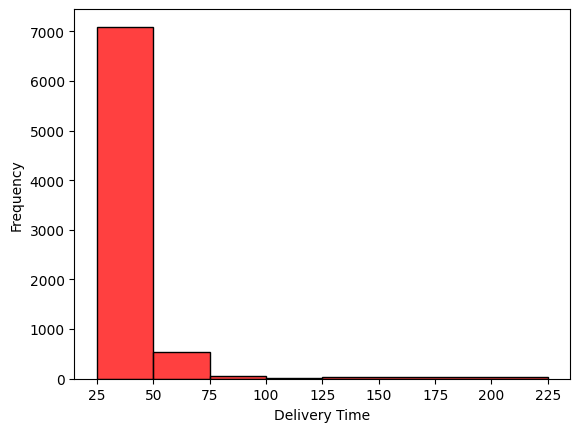

In [59]:
# Membuat histogram
sns.histplot(orders_df['Delivery_time'], bins=[25, 50, 75, 100, 125,225], kde=False, color = "red")

# Menambahkan label sumbu x dan sumbu y
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

Penjelasan:

1. Waktu pengiriman memiliki sebaran menjulur kekanan, yang artinya nilai tengah dari waktu pengiriman dan modus waktu pengiriman lebih besar dari rata-rata waktu pengirimannya.
2. Sebagian besar paket dikirim dengan waktu pengiriman yang singkat, akan tetapi terdapat beberapa waktu pengiriman yang diduga merupakan nilai pencilan

### Menampilkan Boxplot Delivery Time

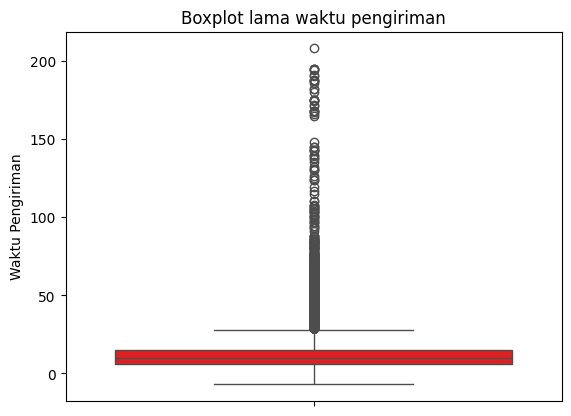

In [108]:
sns.boxplot(y=alljoin_df['Delivery_time'], color = "red")
plt.xlabel("")
plt.ylabel("Waktu Pengiriman")
plt.title("Boxplot lama waktu pengiriman")
plt.show()

Penjelasan: 

Data lama waktu pengiriman memiliki sekali data outlier, yang mengindikasikan bahwa banyak kejadian yang menyebabkan waktu pengiriman lebih lama dibandingkan dengan waktu pengiriman biasanya. Hal tersebut dapat disebabkan oleh berbagai faktor, seperti cuaca, kondisi transportasi, jarak, dan lain-lain.

### Menampilkan Sebaran Review Score

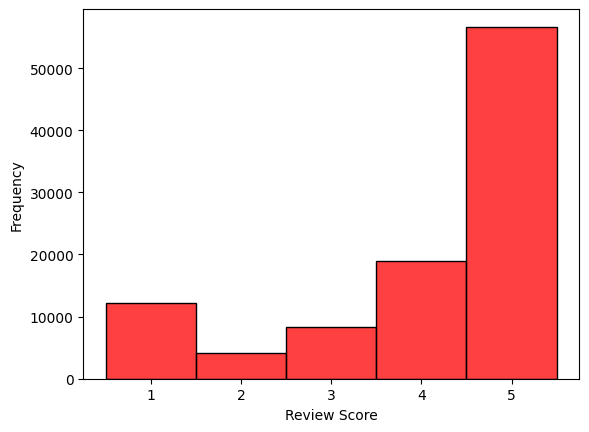

In [61]:
# Membuat histogram
sns.histplot(orders_reviews_df['review_score'], bins=[1, 2, 3, 4, 5, 6], discrete=True, kde=False, color = "red")

# Menambahkan label sumbu x dan sumbu y
plt.xlabel('Review Score')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

Penjelasan:

1. Nilai ulasan memiliki sebaran menjulur kekiri, yang artinya nilai tengah dan modus waktu pengiriman lebih kecil dari rata-rata nilai ulasannya.
2. Banyak pelanggan yang memberi nilai ulasan yang tinggi, yaitu 4 dan 5.

## Explore Tabel Payment dan Items

### Menampilkan Grup Payment Type

In [62]:
payment_itemsjoin_df

,order_id,order_item_id,product_id,price,freight_value,Total Order Price,payment_sequential,payment_type,payment_installments,payment_value,Customer Type
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,72.19,1.0,credit_card,2.0,72.19,Normal Customer
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,259.83,1.0,credit_card,3.0,259.83,Normal Customer
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,216.87,1.0,credit_card,5.0,216.87,Normal Customer
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,25.78,1.0,credit_card,2.0,25.78,Normal Customer
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,218.04,1.0,credit_card,3.0,218.04,Normal Customer
...,...,...,...,...,...,...,...,...,...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,343.40,1.0,boleto,1.0,343.40,Normal Customer
117600,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,36.53,386.53,1.0,boleto,1.0,386.53,Normal Customer
117601,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,16.95,116.85,1.0,credit_card,3.0,116.85,Normal Customer
117602,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72,64.71,1.0,credit_card,3.0,64.71,Normal Customer


In [63]:
payment_itemsjoin_df

,order_id,order_item_id,product_id,price,freight_value,Total Order Price,payment_sequential,payment_type,payment_installments,payment_value,Customer Type
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,72.19,1.0,credit_card,2.0,72.19,Normal Customer
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,259.83,1.0,credit_card,3.0,259.83,Normal Customer
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,216.87,1.0,credit_card,5.0,216.87,Normal Customer
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,25.78,1.0,credit_card,2.0,25.78,Normal Customer
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,218.04,1.0,credit_card,3.0,218.04,Normal Customer
...,...,...,...,...,...,...,...,...,...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,343.40,1.0,boleto,1.0,343.40,Normal Customer
117600,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,36.53,386.53,1.0,boleto,1.0,386.53,Normal Customer
117601,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,16.95,116.85,1.0,credit_card,3.0,116.85,Normal Customer
117602,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72,64.71,1.0,credit_card,3.0,64.71,Normal Customer


In [64]:
payment_itemsjoin_df[payment_itemsjoin_df["payment_type"] == "voucher"]

,order_id,order_item_id,product_id,price,freight_value,Total Order Price,payment_sequential,payment_type,payment_installments,payment_value,Customer Type
38,0016dfedd97fc2950e388d2971d718c7,1,4089861a1bd4685da70bddd6b4f974f1,49.75,20.80,70.55,2.0,voucher,1.0,17.92,Fixed Customer
80,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,53.98,23.31,77.29,1.0,voucher,1.0,44.11,Normal Customer
81,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,53.98,23.31,77.29,2.0,voucher,1.0,33.18,Fixed Customer
120,004345d16a1ab2c21962992c721c8643,1,d0fb1e667e989933a80444f93da833c0,37.90,15.37,53.27,1.0,voucher,1.0,53.27,Normal Customer
182,0071ee2429bc1efdc43aa3e073a5290e,1,00ffe57f0110d73fd84d162252b2c784,179.98,12.46,192.44,1.0,voucher,1.0,100.00,Normal Customer
...,...,...,...,...,...,...,...,...,...,...,...
117426,ff978de32e717acd3b5abe1fb069d2b6,1,0829c25b4a3efca7651f07cd4b8e05bc,27.99,21.15,49.14,2.0,voucher,1.0,10.80,Fixed Customer
117427,ff978de32e717acd3b5abe1fb069d2b6,1,0829c25b4a3efca7651f07cd4b8e05bc,27.99,21.15,49.14,3.0,voucher,1.0,0.66,Fixed Customer
117428,ff978de32e717acd3b5abe1fb069d2b6,1,0829c25b4a3efca7651f07cd4b8e05bc,27.99,21.15,49.14,1.0,voucher,1.0,30.00,Normal Customer
117440,ffa1dd97810de91a03abd7bd76d2fed1,1,2f178dc91b792930e1ff40a77a123506,434.99,20.32,455.31,2.0,voucher,1.0,418.73,Fixed Customer


In [65]:
payment_itemsjoin_df.groupby(by="payment_type").agg({
    "order_id": "count"
}).sort_values(by="order_id", ascending=False)

,order_id
payment_type,
credit_card,86769
boleto,22867
voucher,6274
debit_card,1691


### Menampilkan Grup Customer Type

In [66]:
payment_itemsjoin_df.groupby(by="Customer Type").agg({
    "order_id": "count"
}).sort_values(by="order_id", ascending=False)

,order_id
Customer Type,
Normal Customer,112558
Fixed Customer,4514
Loyal Customer,529


# Visualization & Explanatory Analysis

## Pertanyaan 1: Apa faktor-faktor yang mendorong pelanggan memberikan nilai ulasan rendah terhadap produk yang dibeli?

In [67]:
# Menggunakan label encoding
orders_reviewsjoin_df['delivered_status_encoded'] = orders_reviewsjoin_df['delivered_status'].map({'Delivered on time': 0, 'Delivered Late': 1})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_33168\1344957874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_reviewsjoin_df['delivered_status_encoded'] = orders_reviewsjoin_df['delivered_status'].map({'Delivered on time': 0, 'Delivered Late': 1})


### Menampilkan Boxplot Hubungan Antara Review Score dengan Delivered Status 

In [109]:
delivered_x = orders_reviewsjoin_df["delivered_status_encoded"].astype(int)
review_y = orders_reviewsjoin_df["review_score"].astype(int)

sns.boxplot(x=delivered_x, y=review_y, color = "red")
plt.xticks(ticks=[0, 1], labels=['Delivered On Time', 'Delivered Late'])
plt.xlabel("Status Terkirim")
plt.ylabel("Skor Ulasan")
plt.title("Boxplot Hubungan Antara Skor Ulasan dengan Status Terkirim")
plt.show()

KeyError: 'delivered_status_encoded'

Insight:

1. Barang yang telat terkirim ke customer memiliki rata-rata nilai ulasan yang lebih rendah dibandingkan dengan barang yang terkirim tepat pada waktunya.
2. Ada dua kasus dimana pengiriman tepat waktu juga memiliki nilai ulasan yang rendah, kemungkinan nilai ulasan tersebut berhubungan dengan ketidaksesuaian antara ekspektasi dan realita pelanggan terhadap produk yang dibeli.

In [69]:
np.random.seed(123)
alljoin_df[(alljoin_df["review_score"]<3) & (alljoin_df["delivered_status"] != "Delivered Late")].iloc[:,[0,1,6,7,8,9,10]].sample(5)

,order_id,customer_id,delivered_status,Delivery_time,review_id,review_score,review_comment_message
101386,d42a225e3dd74ca33d58bc18a87a328a,b9359a2c2419370ec7136672ca021e0d,Delivered on time,11.0,e972d3d8c97394942c2b2af8ba832d96,1.0,RECEBI O PRODUTO E AO VERIFICAR CONSTATEI QUE ...
42953,f7e6df47c78b982f0f117ad579519e15,4a32aba7dc9dd56a1dd2feb4773519d8,Delivered on time,7.0,1c0b75274dfc20d452ce98d5bc8f9f15,1.0,produto entregue nao veio de acordo com foto
33734,474f2b1387a07ea0159ca7a996dd09e8,af9f1f9ade37d77f67931dc3ee2210ba,Delivered on time,8.0,80b6a1f49d449a42bc2fe36cbef81099,1.0,Estou aguardando receber
94197,466e24d544d8f5ca12035641fce34386,af00c20d496c7fece930d562a2e997de,Delivered on time,13.0,586c279230b03b7f42bb9661a2e973f6,1.0,veio na medida errada e já solicitei a devoluçao
84249,2f1134015ad299ec4f3ae950c5761e69,0a7798689bde326ea921c4c1f9b2cf48,Delivered on time,7.0,507b807c70276a11b8a95b74cc9de366,1.0,Comprei cobre leito e recebi lençol como se fo...


Jawaban: 

Sebagian besar pelanggan memberikan nilai ulasan yang rendah terhadap paket dengan pengiriman yang melebihi estimasi waktu pengiriman atau dengan kata lain pelanggan tidak menyukai paket yang terlambat terkirim. Selain karena paket yang terlambat terkirim, pelanggan juga memberikan nilai ulasan rendah terhadap barang-barang yang diterima tidak sesuai dengan pesanan atau mengalami kerusakan dan tidak mendapat respon atas komplainnya dari penjual yang bersangkutan. Hal tersebut dapat dilihat pada dataframe diatas, misalkan salah satu pelanggan mengirim ulasan,

"RECEBI O PRODUTO E AO VERIFICAR CONSTATEI QUE O PRODUTO ERA TOTALMENTE DIFERENTE DAQUELE QUE EFETUEI A COMPRA, SOLICITEI A DEVOLUÃ‡ÃƒO E O ENVIO DO PRODUTO CORRETO E ATÃ‰ AGORA NÃƒO OBTIVE RESPOSTA.",

yang artinya "SAYA MENERIMA PRODUK DAN SAAT MEMERIKSA TERNYATA PRODUK INI SAMA SEKALI BERBEDA DARI YANG SAYA BELI, SAYA MINTA PENGEMBALIAN DAN PENGIRIMAN PRODUK YANG BENAR DAN SAMPAI SAAT INI SAYA BELUM MENDAPAT RESPON.". Jadi, penyebab pelanggan mengirim nilai ulasan yang rendah adalah

## Pertanyaan 2: Bagaimana tren jumlah pesanan yang terkirim tepat waktu per bulan dari tahun 2017 hingga tahun 2018?

### Menampilkan Trend Delivered Status

In [70]:
# Membuat kolom bulan dan tahun
orders_df['month_year'] = orders_df['order_delivered_customer_date'].dt.to_period('M')

In [71]:
# Menghitung rata-rata waktu pengiriman per bulan
delivery_time = orders_df.groupby(["month_year","delivered_status"])["delivered_status"].count()
delivery_time

month_year  delivered_status 
2016-10     Delivered on time     208
2016-11     Delivered Late          2
            Delivered on time      58
2016-12     Delivered Late          2
            Delivered on time       2
2017-01     Delivered on time     282
2017-02     Delivered Late          2
            Delivered on time    1348
2017-03     Delivered Late         64
            Delivered on time    2306
2017-04     Delivered Late        103
            Delivered on time    1746
2017-05     Delivered Late        226
            Delivered on time    3525
2017-06     Delivered Late        114
            Delivered on time    3109
2017-07     Delivered Late        117
            Delivered on time    3338
2017-08     Delivered Late        119
            Delivered on time    4183
2017-09     Delivered Late        175
            Delivered on time    3790
2017-10     Delivered Late        219
            Delivered on time    4275
2017-11     Delivered Late        243
            Delivere

<Figure size 1000x600 with 0 Axes>

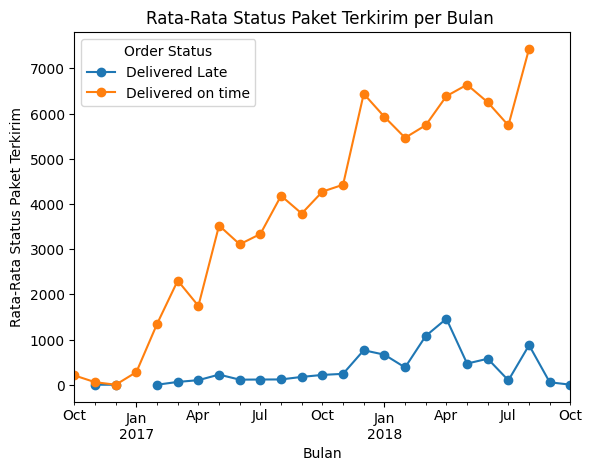

In [72]:
# Membuat line chart
plt.figure(figsize=(10,6))
delivery_time.unstack().plot(kind='line', marker='o')
plt.title('Rata-Rata Status Paket Terkirim per Bulan ')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Status Paket Terkirim')
plt.legend(title='Order Status')
plt.show()

Insight 

1. Banyaknya barang yang terkirim tepat waktu memiliki tren yang naik dari waktu ke waktu.
2. Banyaknya barang yang terkirim tidak tepat waktu memiliki tren yang stasioner, akan tetapi terdapat fluktuatiff pada kuartal 3 2017 hingga kuartal 3 2018. 

Jawaban:

Jika dilihat secara jangka panjang, tren pesanan yang terkirim tepat waktu memiliki tren yang meningkat dari waktu ke waktu. Akan tetapi, dalam jangka pendek tren tersebut memiliki fluktuasi yang cukup tinggi. Selain itu, tren pesanan yang terkirim terlambat memiliki tren yang stasionar dan memiliki tren yang fluktuatif pada kuartal 3 2017 hingga kuartal 3 2018. 

## Pertanyaan 3: Metode pembayaran apa yang paling diminati oleh pelanggan dan efektif untuk meningkatkan penjualan?

### Menampilkan Sebaran Payment Type

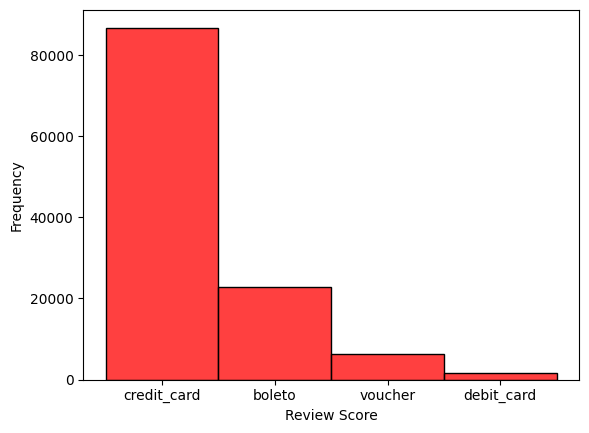

In [73]:
# Membuat histogram
sns.histplot(payment_itemsjoin_df['payment_type'], discrete=True, kde=False, color = "red")

# Menambahkan label sumbu x dan sumbu y
plt.xlabel('Review Score')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

Insight:

1. Metode Pembayaran didominasi oleh pelanggan yang membayar dengan kartu kredit dan boleto.
2. Meskipun pembayaran dengan voucher kurang didominasi oleh kartu kredit dan boleto, pembayaran dengan tipe voucher dapat tergolong cukup tinggi karena voucher tidak selalu ada setiap pelanggan ingin melakukan transaksi pembelian.

### Menampilkan Tren Payment Type

In [74]:
alljoin_df['month_year'] = alljoin_df['order_delivered_customer_date'].dt.to_period('M')

In [75]:
# Menghitung rata-rata waktu pengiriman per bulan
payment_type = alljoin_df.groupby(["month_year","payment_type"])["payment_type"].count()
payment_type

month_year  payment_type
2016-10     boleto           49
            credit_card     195
            debit_card        2
            voucher           6
2016-11     boleto            8
                           ... 
2018-08     debit_card      389
            voucher         368
2018-09     boleto           15
            credit_card      41
2018-10     credit_card       3
Name: payment_type, Length: 92, dtype: int64

<Figure size 1000x600 with 0 Axes>

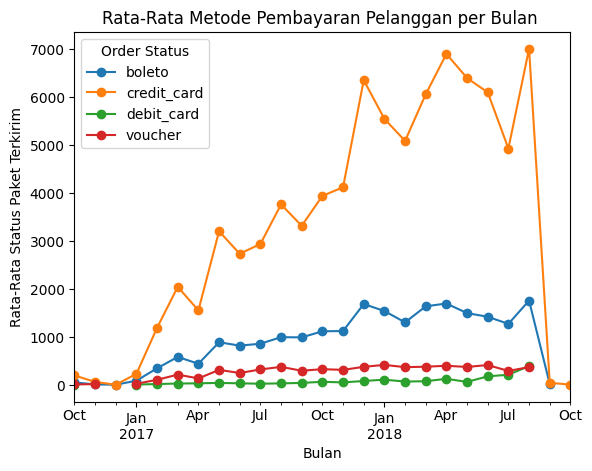

In [76]:
# Membuat line chart
plt.figure(figsize=(10,6))
payment_type.unstack().plot(kind='line', marker='o')
plt.title('Rata-Rata Metode Pembayaran Pelanggan per Bulan ')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Status Paket Terkirim')
plt.legend(title='Order Status')
plt.show()

Insight:

1. Metode pembayaran kartu kredit memiliki tren positif signifikan pada tahun 2017 hingga pada kuartal 3 2018, akan tetapi terdapat penurunan signifikan pada sekitar akhir September 2018. Hal serupa juga terjadi pada penggunaan metode pembayaran Boleto.
2. Pembayaran menggunakan voucher memiliki tren positif mulai pada awal tahun 2017, namun cenderung stasioner setelahnya.
3. Pembayaran mengunakan kartu debit merupakan pembayaran yang kurang diminati oleh pelanggan dan memiliki tren yang stasioner.
4. Penurunan signifikan penggunaan metode kartu kredit dan boleto pada sekitar akhir September 2018 besar kemungkinan diakibatkan oleh data hilang. Hal tersebut didukung oleh kurangnya informasi penggunaan kartu debit dan voucher pada bulan Agustus dan September 2018.
5. Kartu kredit dan boleto memungkinkan pelanggan untuk melakukan transaksi dengan harga awal yang murah atau uang muka, hal yang serupa terjadi pada pembayaran tipe voucher yang memungkinkan pelanggan untuk membeli produk dengan harga murah. Kedua hal tersebut mengindikasikan bahwa pelanggan menyukai produk yang memiliki harga atau harga awal yang murah.  

jawaban:

Pelanggan menyukai metode pembayaran dengan menggunakan kartu kredit dan boleto. Hal tersebut diasumsikan karena memberikan kesempatan kepada pelanggan untuk membayar uang muka dengan harga yang murah. Selain kedua metode pembayaran tersebut, voucher merupakan salah satu metode yang diminati oleh pelanggan, meskipun lebih rendah penggunaannya dibandingkan dengan kartu kredit dan boleto. Hal tersebut dikarenakan voucher tidak selalu diberikan kepada pelanggan dan biasanya pelanggan akan tertarik pada produk yang memiliki voucher karena akan memberikan diskon terhadap produk yang akan dibeli, yang artinya pelanggan dapat membayar dengan harga yang murah dibandingkan harga aslinya. Hal tersebut memberikan kesempatan untuk meningkatkan voucher kepada pelanggan, guna untuk meningkatkan penjualan pada tahun 2019.

## Pertanyaan 4: Pendekatan apa yang dapat diambil untuk meningkatkan penjualan di pasar dengan mengidentifikasi dan menjangkau target pasar yang tepat secara efektif?

### Menampilkan Sebaran Customer Type

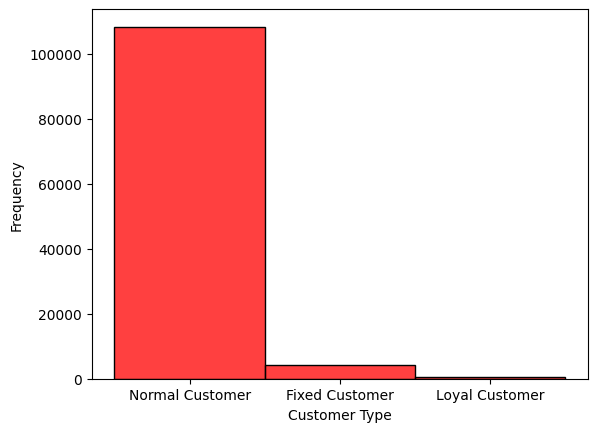

In [77]:
# Membuat histogram
sns.histplot(alljoin_df['Customer Type'], discrete=True, kde=False, color = "red")

# Menambahkan label sumbu x dan sumbu y
plt.xlabel('Customer Type')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [78]:
alljoin_df[alljoin_df['Customer Type'] != "Normal Customer"]

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivered_status,Delivery_time,review_id,review_score,...,product_id,price,freight_value,Total Order Price,payment_sequential,payment_type,payment_installments,payment_value,Customer Type,month_year
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18,Delivered on time,8.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,87285b34884572647811a353c7ac498a,29.99,8.72,38.71,3.0,voucher,1.0,2.00,Fixed Customer,2017-10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18,Delivered on time,8.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,87285b34884572647811a353c7ac498a,29.99,8.72,38.71,2.0,voucher,1.0,18.59,Fixed Customer,2017-10
10,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 12:05:00,2017-08-16 17:14:00,2017-08-23,Delivered on time,18.0,abc5655186d40772bd6e410420e6a3ed,5.0,...,9a78fb9862b10749a117f7fc3c31f051,149.99,19.77,169.76,2.0,voucher,1.0,161.42,Fixed Customer,2017-08
21,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 16:08:00,2017-11-08 22:22:00,2017-11-23,Delivered on time,13.0,219cf59cf889bc85babbd1cd1fe30f2d,4.0,...,c35498fbb4358837ae16850f50c3fd22,76.00,16.97,92.97,2.0,voucher,1.0,62.15,Fixed Customer,2017-11
22,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 16:08:00,2017-11-08 22:22:00,2017-11-23,Delivered on time,13.0,219cf59cf889bc85babbd1cd1fe30f2d,4.0,...,c35498fbb4358837ae16850f50c3fd22,76.00,16.97,92.97,3.0,voucher,1.0,24.86,Fixed Customer,2017-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113170,4bafa54db6b060da198f23f810835969,48094f58f03bec9519bd0e004ce460df,delivered,2018-04-05 15:09:00,2018-04-30 21:41:00,2018-05-14,Delivered on time,25.0,052150c42f7cc01bad8bd1b3d760f2df,5.0,...,5ac4f7986643a944501c66a2257bdd73,49.90,35.71,85.61,2.0,voucher,1.0,49.32,Fixed Customer,2018-04
113171,4bafa54db6b060da198f23f810835969,48094f58f03bec9519bd0e004ce460df,delivered,2018-04-05 15:09:00,2018-04-30 21:41:00,2018-05-14,Delivered on time,25.0,052150c42f7cc01bad8bd1b3d760f2df,5.0,...,5ac4f7986643a944501c66a2257bdd73,49.90,35.71,85.61,3.0,voucher,1.0,8.13,Fixed Customer,2018-04
113268,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 20:07:00,2017-10-20 20:25:00,2017-11-07,Delivered on time,16.0,ebd75732b5804e934123d11ec1f11db0,5.0,...,c982dbea53b864f4d27c1d36f14b6053,42.11,0.80,42.91,2.0,voucher,1.0,64.37,Fixed Customer,2017-10
113270,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 20:07:00,2017-10-20 20:25:00,2017-11-07,Delivered on time,16.0,ebd75732b5804e934123d11ec1f11db0,5.0,...,49d2e2460386273b195e7e59b43587c3,26.90,36.98,90.78,2.0,voucher,1.0,64.37,Fixed Customer,2017-10


In [79]:
payment_itemsjoin_df.groupby(by="Customer Type").agg({
    "order_id": "count"
}).sort_values(by="order_id", ascending=False)

,order_id
Customer Type,
Normal Customer,112558
Fixed Customer,4514
Loyal Customer,529


Jawaban:

Metode pembayaran dengan menggunakan voucher dapat diterapkan secara maksimal kepada pelanggan-pelanggan tetap, seperti Fixed Customer dan Loyal Customer. Hal tersebut akan mendorong mereka untuk terus berlangganan dan membuat mereka menjadi pelanggan tetap maupun pelanggan setia. Voucher juga dapat diterapkan Normal Customer dengan tujuan untuk menarik pelanggan untuk melakukan transaksi terhadap suatu produk. Untuk mengurangi kerugian, voucher dapat diterapkan pada saat tanggal spesial seperti 01 January, 02 February, hari spesial seperti hari imlek, maupun untuk melakukan cuci gudang. Hal tersebut dapat meningkatkan penjualan dengan target pasar sesuai dengan tipe pelanggannya.

## Conclusion

1. Banyaknya barang yang terkirim tepat waktu memiliki tren yang naik dari waktu ke waktu.
2. Banyaknya barang yang terkirim tidak tepat waktu memiliki tren yang stasioner, akan tetapi terdapat fluktuatiff pada kuartal 3 2017 hingga kuartal 3 2018. 

- Conclution pertanyaan 1

Nilai ulasan yang rendah dari pelanggan merupakan akibat dari pengiriman yang terlambat dan tidak sesuainya pesanan yang diterima dibandingkan dengan yang dipesan dan kurangnya respon penjual dalam merespon komplain pelanggan.
- Conclution pertanyaan 2

Banyak barang yang terkirim tepat waktu dan memiliki tren positif jika dilihat secara jangka panjang dan memiliki tren fluktuatif jika dilihat secara jangka pendek. Barang yang terkirim terlambat memiliki tren yang stasioner dan berfluktuasi pada periode kuartal 3 2017 hingga kuartal 3 2018
- Conclution pertanyaan 3

Pelanggan minat terhadap metode pembayaran kartu kredit, boleto, dan voucher. Pelanggan kurang minat terhadap kartu debit. Voucher merupakan aset penting untuk meningkatkan penjualan di periode ke depan.
- Conclution pertanyaan 4

Dapat diterapkan secara maksimal voucher kepada pelanggan-pelanggan tetap, seperti Fixed Customer dan Loyal Customer. Selain itu, dapat diterapkan juga voucher kepada Normal Customer untuk menarik mereka dalam melakukan transaksi.


# Analisis Lanjutan

In [80]:
alljoin_df

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivered_status,Delivery_time,review_id,review_score,...,product_id,price,freight_value,Total Order Price,payment_sequential,payment_type,payment_installments,payment_value,Customer Type,month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18,Delivered on time,8.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,87285b34884572647811a353c7ac498a,29.99,8.72,38.71,1.0,credit_card,1.0,18.12,Normal Customer,2017-10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18,Delivered on time,8.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,87285b34884572647811a353c7ac498a,29.99,8.72,38.71,3.0,voucher,1.0,2.00,Fixed Customer,2017-10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18,Delivered on time,8.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,87285b34884572647811a353c7ac498a,29.99,8.72,38.71,2.0,voucher,1.0,18.59,Fixed Customer,2017-10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:00,2018-08-07 15:27:00,2018-08-13,Delivered on time,13.0,8d5266042046a06655c8db133d120ba5,4.0,...,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,141.46,1.0,boleto,1.0,141.46,Normal Customer,2018-08
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:00,2018-08-17 18:06:00,2018-09-04,Delivered on time,9.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,...,aa4383b373c6aca5d8797843e5594415,159.90,19.22,179.12,1.0,credit_card,3.0,179.12,Normal Customer,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113275,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 13:10:00,2018-02-28 17:37:00,2018-03-02,Delivered on time,22.0,29bb71b2760d0f876dfa178a76bc4734,4.0,...,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,195.00,1.0,credit_card,3.0,195.00,Normal Customer,2018-02
113276,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 15:04:00,2017-09-21 11:24:00,2017-09-27,Delivered on time,25.0,371579771219f6db2d830d50805977bb,5.0,...,b80910977a37536adeddd63663f916ad,205.99,65.02,271.01,1.0,credit_card,5.0,271.01,Normal Customer,2017-09
113277,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:36:00,2018-01-25 23:32:00,2018-02-15,Delivered on time,17.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,...,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,220.58,1.0,credit_card,4.0,441.16,Normal Customer,2018-01
113278,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:36:00,2018-01-25 23:32:00,2018-02-15,Delivered on time,17.0,8ab6855b9fe9b812cd03a480a25058a1,2.0,...,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,400.57,1.0,credit_card,4.0,441.16,Normal Customer,2018-01


In [81]:
rfm_df = alljoin_df.groupby(by="customer_id", as_index=False).agg({
    "order_approved_at": "max", #mengambil tanggal order terakhir
    "order_item_id": "nunique",
    "payment_value": "sum"
})
rfm_df
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:00,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:00,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:00,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:00,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:00,1,107.01


In [82]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_approved_at"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74,288
1,000161a058600d5901f007fab4c27140,2017-07-16,1,67.41,409
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,195.42,547
3,0002414f95344307404f0ace7a26f1d5,2017-08-17,1,179.35,377
4,000379cdec625522490c315e70c7a9fb,2018-04-04,1,107.01,147


In [83]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,288
1,000161a058600d5901f007fab4c27140,1,67.41,409
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547
3,0002414f95344307404f0ace7a26f1d5,1,179.35,377
4,000379cdec625522490c315e70c7a9fb,1,107.01,147


In [84]:
rfm_df.sort_values(by="recency", ascending=False)

,customer_id,frequency,monetary,recency
49681,86dc2ffce2dfff336de2f386a786e574,0,0.00,713
81622,dc607dc98d6a11d5d04d9f2a70aa6c34,1,92.27,694
92195,f9808148a262b51d20e2d777eee6676c,1,319.00,694
44225,7812fcebfc5e8065d31e1bb5f0017dae,1,40.95,694
41525,70fc57eeae292675927697fe03ad3ff5,1,35.61,694
...,...,...,...,...
25252,448945bc713d98b6726e82eda6249b9e,5,2486.25,0
68456,b8c19e70d00f6927388e4f31c923d785,1,178.25,0
27169,49a6ae8a95c6a78d90945b983ab1ecfc,4,557.72,0
70466,be169d57b327a59f2db49cffdc6caf13,1,188.13,0


In [85]:
rfm_df.sort_values(by="frequency", ascending=False)

,customer_id,frequency,monetary,recency
93154,fc3d1daec319d62d49bfb5e1f83123e9,21,4118.31,408
70475,be1b70680b9f9694d8c70f41fa3dc92b,20,44048.00,186
6174,10de381f8a8d23fff822753305f71cae,15,18384.75,278
64275,adb32467ecc74b53576d9d13a5a55891,15,11745.00,576
79291,d5f2b3f597c7ccafbb5cac0bcc3d6024,14,14196.28,257
...,...,...,...,...
33164,5a20ca312082cc032cb3404183049384,1,193.51,112
33162,5a1e7189a48abe6237615c19e635f9d9,1,416.55,266
33161,5a1e5c42e6d73688dfd4597bf24eb988,1,44.75,478
47264,8024af9135f058848c0c8400a9de55a2,1,105.29,400


In [88]:
rfm_df.sort_values(by="recency", ascending=True).sample(5)

,customer_id,frequency,monetary,recency
61484,a66b6159d86d6545fc29ecfda546b4d7,1,60.94,101
86928,eac1c5147416e3773dc2b3ed66098363,1,70.59,29
70234,bd5f97a553bbec7fc62b0f7866b62447,1,146.90,34
14420,26f548cf7e36c8ff56020cc845f5df8c,1,43.52,511
52898,8f8b7a582620f3717c11fde831e8860d,1,186.94,207


C:\Users\Administrator\AppData\Local\Temp\ipykernel_33168\2890961470.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).sample(5), palette=colors, ax=ax[0], legend=False)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_33168\2890961470.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).sample(5), palette=colors, ax=ax[1], legend=False)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_33168\2890961470.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

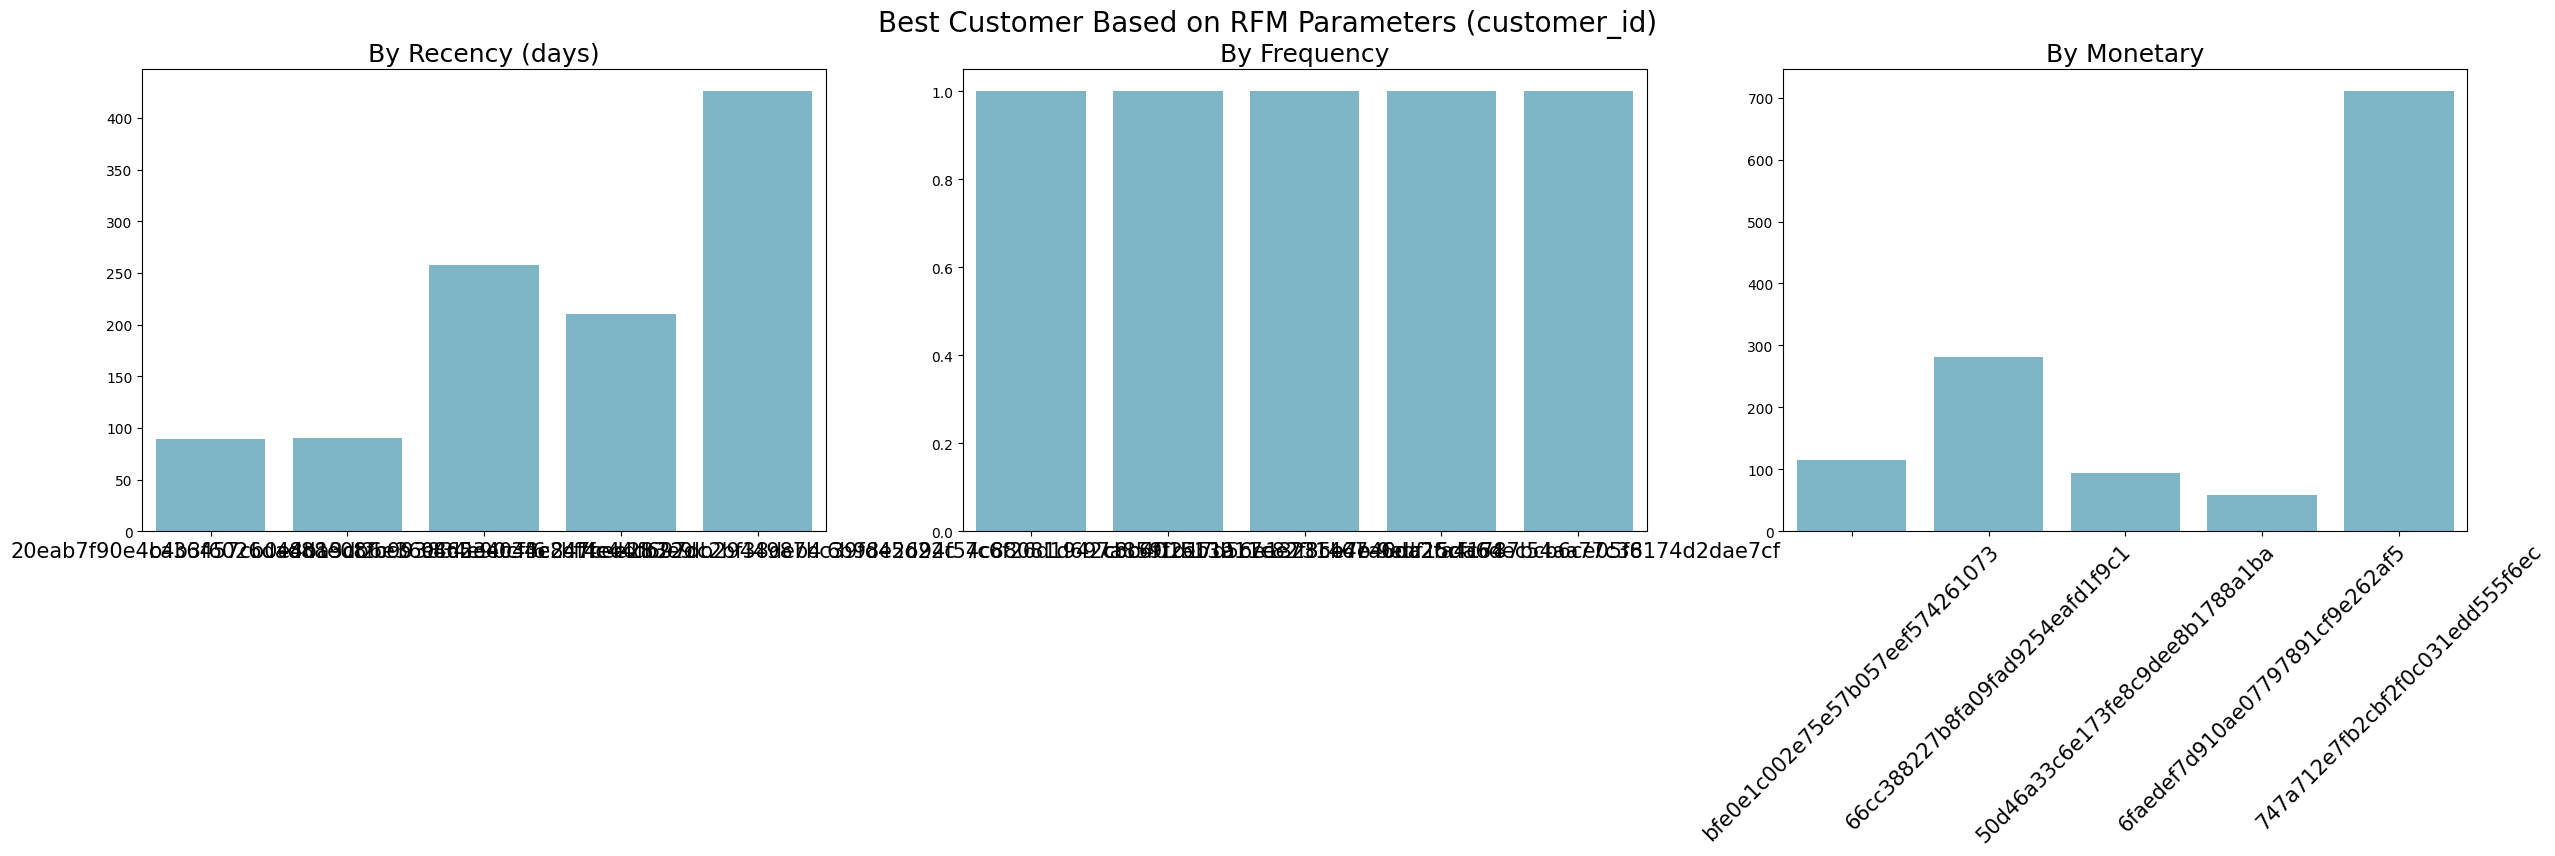

In [100]:
np.random.seed(123)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).sample(5), palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).sample(5), palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).sample(5), palette=colors, ax=ax[2], legend=False)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.xticks(rotation=45)
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


In [90]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,288,32196.5,42561.0,49101.0
1,000161a058600d5901f007fab4c27140,1,67.41,409,15684.0,42561.0,26762.0
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547,2558.0,42561.0,70798.5
3,0002414f95344307404f0ace7a26f1d5,1,179.35,377,19906.5,42561.0,67937.0
4,000379cdec625522490c315e70c7a9fb,1,107.01,147,63709.5,42561.0,46184.5


In [91]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,288,34.062440,45.024278,51.942790
1,000161a058600d5901f007fab4c27140,1,67.41,409,16.592962,45.024278,28.310889
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547,2.706248,45.024278,74.896064
3,0002414f95344307404f0ace7a26f1d5,1,179.35,377,21.060176,45.024278,71.868950
4,000379cdec625522490c315e70c7a9fb,1,107.01,147,67.401769,45.024278,48.857493


In [92]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,2.37
1,000161a058600d5901f007fab4c27140,1.56
2,0001fd6190edaaf884bcaf3d49edf079,2.79
3,0002414f95344307404f0ace7a26f1d5,2.84
4,000379cdec625522490c315e70c7a9fb,2.53
5,0004164d20a9e969af783496f3408652,1.56
6,000419c5494106c306a97b5635748086,1.55


In [93]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,2.37,Low value customers
1,000161a058600d5901f007fab4c27140,1.56,lost customers
2,0001fd6190edaaf884bcaf3d49edf079,2.79,Low value customers
3,0002414f95344307404f0ace7a26f1d5,2.84,Low value customers
4,000379cdec625522490c315e70c7a9fb,2.53,Low value customers
5,0004164d20a9e969af783496f3408652,1.56,lost customers
6,000419c5494106c306a97b5635748086,1.55,lost customers
7,00046a560d407e99b969756e0b10f282,2.92,Low value customers
8,00050bf6e01e69d5c0fd612f1bcfb69c,1.92,Low value customers
9,000598caf2ef4117407665ac33275130,4.16,High value customer


In [94]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,4970
1,Low value customers,45023
2,Medium value customer,22701
3,Top customers,2048
4,lost customers,19787


In [95]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_33168\2514602748.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


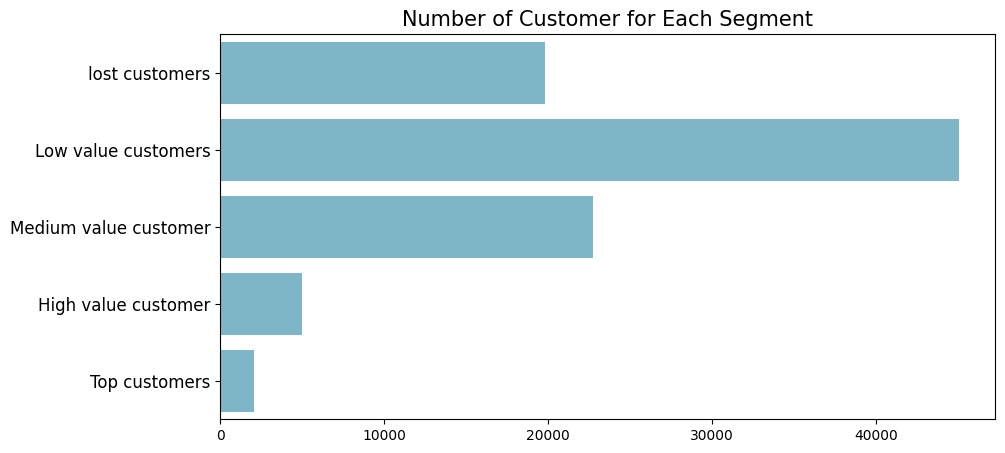

In [104]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Sebagian besar customer didominasi oleh medium value customer dan low value customer, yang artinya pelanggan tersebut secara berturut-turut melakukan transaksi rendah dan menengah. Selain itu, cukup banyak pelanggan yang telah berhenti melakukan transaksi, yaitu kurang lebih sebesar 20000 pelanggan. Selain itu, terdapat beberapa high value dan top customer, yang artinya terdapat beberapa pelanggan yang melakukan transaksi tinggi dan beharga bagi perusahaan. Pelanggan tipe medium, high, dan top disarankan untuk diberikan promo agar mereka tetap melakukan transaksi untuk jangka waktu yang panjang.

In [106]:
alljoin_df.to_csv('data.csv', index=False)

In [107]:
alljoin_df['order_approved_at'] = pd.to_datetime(alljoin_df['order_approved_at'], 
                                                format ='%d/%m/%Y %H:%M')
alljoin_df['order_delivered_customer_date'] = pd.to_datetime(alljoin_df['order_delivered_customer_date'],
                                                            format ='%d/%m/%Y %H:%M')
alljoin_df['order_estimated_delivery_date'] = pd.to_datetime(alljoin_df['order_estimated_delivery_date'],
                                                            format ='%d/%m/%Y %H:%M')